In [1]:
import numpy as np
import librosa
from librosa import display
import matplotlib.pyplot as plt

In [ ]:
# Spectrogram

Text(0.5, 1.0, 'Spectrogram (dB)')

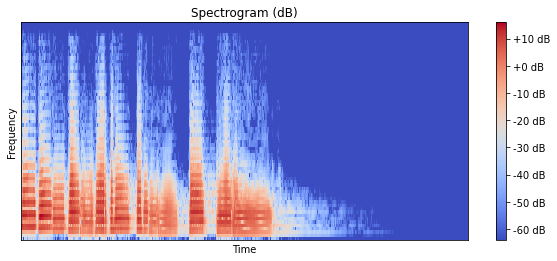

In [2]:
x, sample_rate = librosa.load(librosa.ex('trumpet'))
y = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

# x: input wavfile
# n_fft: fft point
# hop_length: shift size
# win_length: frame length
# window: default: 'hann'


magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=64)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

In [ ]:
# Mel-frequency spectrogram

In [3]:
y, sr = librosa.load(librosa.ex('trumpet'))
librosa.feature.melspectrogram(y=y, sr=sr)

array([[2.4131639e-06, 1.5232944e-06, 1.1177117e-07, ..., 5.6869110e-17,
        1.1107914e-15, 1.5393561e-13],
       [6.6976972e-06, 3.9224637e-06, 4.3334890e-07, ..., 6.2453844e-17,
        1.0797940e-15, 1.5271359e-13],
       [1.3604471e-05, 6.3215903e-06, 6.4498124e-07, ..., 6.9822428e-17,
        1.1446380e-15, 1.5310404e-13],
       ...,
       [1.3665126e-05, 6.9757539e-06, 5.4306515e-06, ..., 9.4364641e-09,
        8.5835854e-09, 4.1650443e-09],
       [5.9878557e-06, 4.2635202e-06, 3.0145884e-06, ..., 3.0839985e-08,
        3.6750144e-08, 2.2055019e-08],
       [3.0129019e-07, 3.7461905e-07, 2.6860044e-07, ..., 3.0828634e-08,
        1.7937158e-08, 2.5719807e-08]], dtype=float32)

In [4]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

In [5]:
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

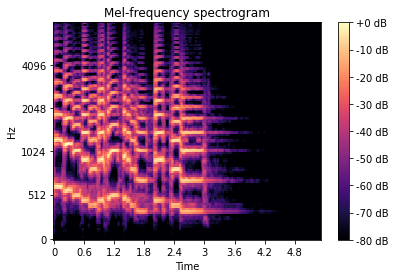

In [6]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
# Spectral centroid

In [7]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent

array([[1774.10581739, 1919.22278534, 2074.23115641, 2040.23103866,
        1879.48986562, 1741.46859162, 1735.97767974, 1693.16758775,
        1632.84642876, 1924.45188393, 2064.11766938, 2091.045268  ,
        1996.03871185, 1833.95150522, 1719.98682068, 1693.38139601,
        1572.35988837, 1552.35229186, 1602.16423556, 1590.19844463,
        1520.08009976, 1524.18275663, 1491.1432419 , 1451.02204432,
        1801.7090971 , 2131.13992021, 2274.77968365, 2189.14534817,
        2049.95272938, 1843.94619932, 1675.92629971, 1600.02227399,
        1591.39369183, 1554.19870355, 1498.14134014, 1510.76231248,
        1559.25170319, 1528.45992756, 1672.82570298, 2018.82118523,
        2212.84843155, 2205.80234591, 2121.40746631, 2062.24742039,
        1908.06028198, 1678.48156605, 2047.81159134, 2200.58272674,
        1898.17683233, 1834.60516493, 1900.7770763 , 1778.25307519,
        1670.26335906, 1583.9392249 , 1481.79717084, 1446.44924936,
        1417.52040303, 1435.56182457, 1637.89764

In [8]:
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_centroid(S=S)

array([[1774.10581739, 1919.22278534, 2074.23115641, 2040.23103866,
        1879.48986562, 1741.46859162, 1735.97767974, 1693.16758775,
        1632.84642876, 1924.45188393, 2064.11766938, 2091.045268  ,
        1996.03871185, 1833.95150522, 1719.98682068, 1693.38139601,
        1572.35988837, 1552.35229186, 1602.16423556, 1590.19844463,
        1520.08009976, 1524.18275663, 1491.1432419 , 1451.02204432,
        1801.7090971 , 2131.13992021, 2274.77968365, 2189.14534817,
        2049.95272938, 1843.94619932, 1675.92629971, 1600.02227399,
        1591.39369183, 1554.19870355, 1498.14134014, 1510.76231248,
        1559.25170319, 1528.45992756, 1672.82570298, 2018.82118523,
        2212.84843155, 2205.80234591, 2121.40746631, 2062.24742039,
        1908.06028198, 1678.48156605, 2047.81159134, 2200.58272674,
        1898.17683233, 1834.60516493, 1900.7770763 , 1778.25307519,
        1670.26335906, 1583.9392249 , 1481.79717084, 1446.44924936,
        1417.52040303, 1435.56182457, 1637.89764

In [9]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

array([[1774.10237719, 1919.25420028, 2073.95773016, 2040.54272717,
        1879.83673365, 1741.16553925, 1736.11545345, 1692.99993861,
        1633.12475588, 1924.56313779, 2063.92464689, 2090.93553358,
        1996.4035043 , 1834.72219994, 1720.51538888, 1693.3108642 ,
        1572.27500336, 1551.93586731, 1602.17656937, 1590.72644545,
        1520.33444663, 1524.16627234, 1491.11427276, 1451.13546797,
        1802.15576347, 2131.21680795, 2274.62056395, 2189.30591433,
        2050.35286802, 1844.5803508 , 1676.00930701, 1599.91292223,
        1591.24038414, 1554.36197203, 1498.59479622, 1511.20803787,
        1559.31315065, 1528.43689562, 1672.64299519, 2018.52098633,
        2212.73535394, 2206.05754018, 2121.58988441, 2062.27363446,
        1907.7444248 , 1678.20473966, 2047.90358475, 2200.41252345,
        1898.09080242, 1834.42774667, 1900.88232909, 1778.67652322,
        1670.61416193, 1583.93339397, 1481.95158458, 1446.46322916,
        1417.45352023, 1435.38776952, 1638.14543

[Text(0.5, 1.0, 'log Power spectrogram')]

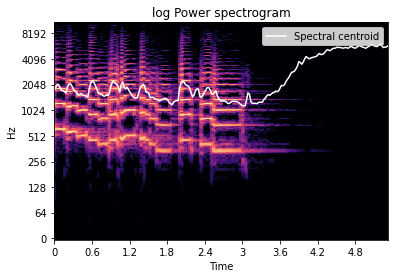

In [10]:
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

In [ ]:
# Zero Crossing Rate

In [13]:
signal_feature = librosa.feature.zero_crossing_rate(y)[0, 0]

Text(0, 0.5, 'Count')

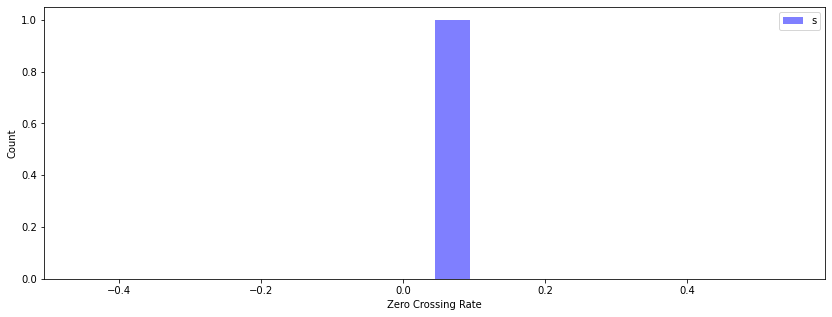

In [14]:
plt.figure(figsize=(14, 5))
plt.hist(signal_feature, color='b', alpha=0.5, bins=20)
plt.legend(('signal feature'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')